# Pima dataset (from UCL datsets repository)

income
<=50K     37155
>50K      11687
Name: count, dtype: int64
Classification with SplitVotingEnsemble...


5-fold:   0%|          | 0/5 [00:00<?, ?it/s]

,measure
Accuracy,0.795±0.003
BA,0.788±0.006
Precision,0.735±0.003
Recall,0.788±0.006
MCC,0.520±0.008
cm,"[[29820, 7335], [2654, 9033]]"


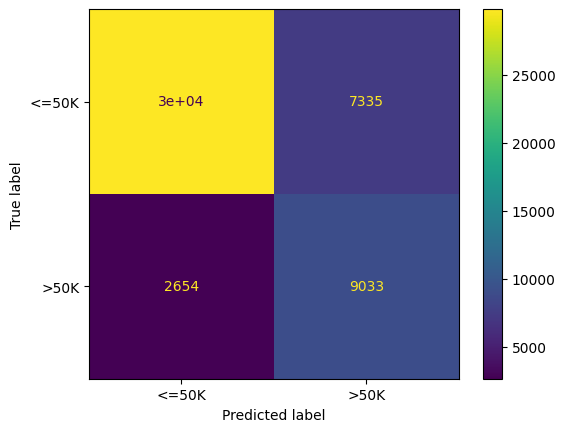

In [1]:
from svelearn.models.splitvotingens import SplitVotingEnsemble
from svelearn.validation.crossvalidate import skfold_cv
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.tree import ExtraTreeClassifier
myscorer = {'Accuracy'  :  (accuracy_score , {}),
             'BA'  :       (balanced_accuracy_score , {}),
             'Precision' : (precision_score, {'pos_label': 1, 'average':'macro'}),
             'Recall' :    (recall_score   , {'pos_label': 1, 'average':'macro'}),
             'MCC' :       (matthews_corrcoef, {}), 
            }
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(X).toarray()
Y = adult.data.targets
Y = Y.replace({'<=50K.': '<=50K', '>50K.':'>50K'})
print(Y.value_counts())
clf = ExtraTreeClassifier(random_state=0)
svclf = SplitVotingEnsemble(clf, n_voters=4)
df_scores, scores, predictions = skfold_cv(X, Y, svclf, n_splits=5, seed=0, show_progress=True, verbose=True, scorer=myscorer, precision=3)
df_scores